# Регуляризация

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Подготовка данных

In [2]:
boston = pd.read_csv('/content/boston.csv')

X = boston[['LSTAT', 'RM', 'PTRATIO', 'INDUS']]
y = boston.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

FileNotFoundError: [Errno 2] No such file or directory: '/content/boston.csv'

## Линейная регрессия

### Ordinary Least Squares

In [ ]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X_train, y_train)

y_pred_train = ols.predict(X_train)
y_pred_test = ols.predict(X_test)

from sklearn.metrics import root_mean_squared_error

print('train: ' + str(root_mean_squared_error(y_train, y_pred_train)))
print('test: ' + str(root_mean_squared_error(y_test, y_pred_test)))

train: 5.255700309296848
test: 5.127682560624116


### Ridge Regression (L2 regularization)

#### Нормальные уравнения

собственный класс

In [ ]:
class RidgeReg():

  def __init__(self, alpha = 1.0):

    self.alpha = alpha
    self.thetas = None

  def fit(self, x, y):

    x = x.copy()
    x = self.add_ones(x)
    I = np.identity(x.shape[1])
    I[0][0] = 0

    self.thetas = np.linalg.inv(x.T.dot(x) + self.alpha * I).dot(x.T).dot(y)

  def predict(self, x):

    x = x.copy()
    x = self.add_ones(x)
    return np.dot(x, self.thetas)

  def add_ones(self, x):
    return np.c_[np.ones((len(x), 1)), x]

In [ ]:
ridge = RidgeReg(alpha = 10)

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print('train: ' + str(root_mean_squared_error(y_train, y_pred_train)))
print('test: ' + str(root_mean_squared_error(y_test, y_pred_test)))

train: 5.258077962476522
test: 5.104623428412015


класс sklearn

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print('train: ' + str(root_mean_squared_error(y_train, y_pred_train)))
print('test: ' + str(root_mean_squared_error(y_test, y_pred_test)))

train: 5.258077962476521
test: 5.104623428412015


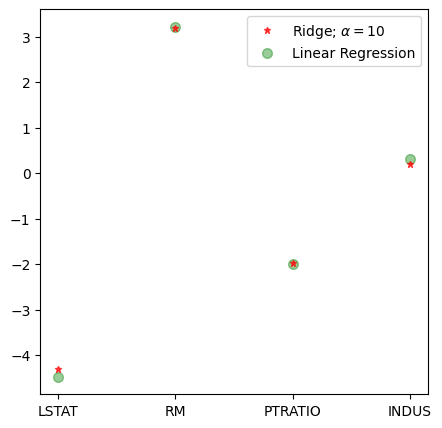

In [ ]:
features = X.columns

plt.figure(figsize = (5, 5))
plt.plot(features, ridge.coef_, alpha = 0.7, linestyle = 'none' , marker = '*', markersize = 5, color = 'red', label = r'Ridge; $\alpha = 10$', zorder = 7)
plt.plot(features, ols.coef_, alpha = 0.4, linestyle = 'none', marker = 'o', markersize = 7, color = 'green', label = 'Linear Regression')
plt.xticks(rotation = 0)
plt.legend()
plt.show()